### Trends Over Time: 

#### Analyze job postings over time to identify trends in hiring. Are there particular months or seasons with increased job postings?

### Importing Necessary Libraries and Loading Datasets

In this section, we import the **pandas** library for data manipulation and analysis in Python. 

We then load several datasets related to LinkedIn job postings using `pd.read_csv()`. Each dataset contains different aspects of job postings, such as:

- **postings**: Contains the job postings details.
- **companies**: Lists information about the companies offering the jobs.
- **company_industries**: Provides information about the industries these companies operate in.
- **company_specialities**: Details the specialties of each company.
- **employee_counts**: Contains the number of employees in each company.
- **salaries**: Provides salary information associated with the job postings.
- **job_skills**: Lists the skills required for each job.
- **job_industries**: Details the industries related to the job postings.



In [1]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\job_industries.csv')


In [2]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int64  
 1   company_name          35564 non-null  object 
 2   title                 35564 non-null  object 
 3   description           35564 non-null  object 
 4   pay_period            35564 non-null  object 
 5   location              35564 non-null  object 
 6   company_id            35564 non-null  int64  
 7   views                 35564 non-null  int64  
 8   formatted_work_type   35564 non-null  object 
 9   applies               35564 non-null  int64  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  object 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

### Data Type Conversion for Postings Dataset

In this step, we convert the data types in the **postings** DataFrame to optimize memory usage and improve performance:

- **job_id** and **company_id**: Converted to `int32` for efficient storage.
- **company_name**, **title**, **description**, **pay_period**, **location**, **formatted_work_type**, **job_posting_url**, **work_type**, and **zip_code**: Changed to `string` for better text handling.
- **views**, **applies**, and **fips**: Also set to `int32`.
- **normalized_salary**: Converted to `float` to accommodate decimal values.

This ensures our data is in the right format for analysis.


In [3]:
postings = postings.astype({
    'job_id': 'int32',
    'company_name': 'string',    # Use 'string' for modern text processing (like VARCHAR)
    'title': 'string',
    'description': 'string',
    'pay_period': 'string',
    'location': 'string',
    'company_id': 'int32',
    'views': 'int32',
    'formatted_work_type': 'string',
    'applies': 'int32',
    'job_posting_url': 'string',
    'work_type': 'string',
    'normalized_salary': 'float',
    'zip_code': 'string',
    'fips': 'int32'
})

#### **Extract Monthly Data:** Create a new column for the month and year of each job posting.


In [4]:
postings.head(3)

,job_id,company_name,title,description,pay_period,location,company_id,views,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,expiry,listed_time,work_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719,8,Full-time,0,2024-04-16 14:26:54,False,https://www.linkedin.com/jobs/view/10998357/?t...,2024-05-16 14:26:54,2024-04-16 14:26:54,FULL_TIME,55000.0,45202.0,39061
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262,16,Full-time,0,2024-04-12 04:23:32,False,https://www.linkedin.com/jobs/view/23221523/?t...,2024-05-12 04:23:32,2024-04-12 04:23:32,FULL_TIME,157500.0,11040.0,36059


In [5]:
print(postings['original_listed_time'].unique())

['2024-04-17 23:45:08' '2024-04-16 14:26:54' '2024-04-12 04:23:32' ...
 '2024-04-20 00:20:31' '2024-04-20 00:00:23' '2024-04-20 00:23:36']


In [6]:
postings['original_listed_time'] = pd.to_datetime(postings['original_listed_time'], errors='coerce')
postings['expiry'] = pd.to_datetime(postings['expiry'], errors='coerce')

In [7]:
postings.head(3)

,job_id,company_name,title,description,pay_period,location,company_id,views,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,expiry,listed_time,work_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719,8,Full-time,0,2024-04-16 14:26:54,False,https://www.linkedin.com/jobs/view/10998357/?t...,2024-05-16 14:26:54,2024-04-16 14:26:54,FULL_TIME,55000.0,45202.0,39061
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262,16,Full-time,0,2024-04-12 04:23:32,False,https://www.linkedin.com/jobs/view/23221523/?t...,2024-05-12 04:23:32,2024-04-12 04:23:32,FULL_TIME,157500.0,11040.0,36059


### Extracting Month and Year from Listed Time

We create a new column called **month_year** in the **postings** DataFrame. This captures the month and year from the **original_listed_time** column by converting it to a monthly period format, which helps in analyzing job postings over time.


In [8]:
postings['month_year'] = postings['original_listed_time'].dt.to_period('M')

### Counting Monthly Job Postings

We group the **postings** DataFrame by the **month_year** column and count the number of job postings for each month. The result is stored in a new DataFrame called **monthly_postings**, which contains the total job postings per month in a column named **job_posting_count**.


In [9]:
monthly_postings = postings.groupby('month_year').size().reset_index(name='job_posting_count')
monthly_postings

,month_year,job_posting_count
0,2024-01,1
1,2024-02,4
2,2024-03,512
3,2024-04,35047


#### **Visualize Job Postings Over Time:** Plot the data to visualize trends.

### Visualizing Job Postings Over Time

We import **matplotlib.pyplot** for data visualization and create a line plot to show job postings over time. The x-axis represents the **month_year**, while the y-axis displays the **job_posting_count**. The plot includes markers for clarity, a title, and labeled axes, with x-ticks rotated for better readability. A grid is added for easier interpretation of the data.


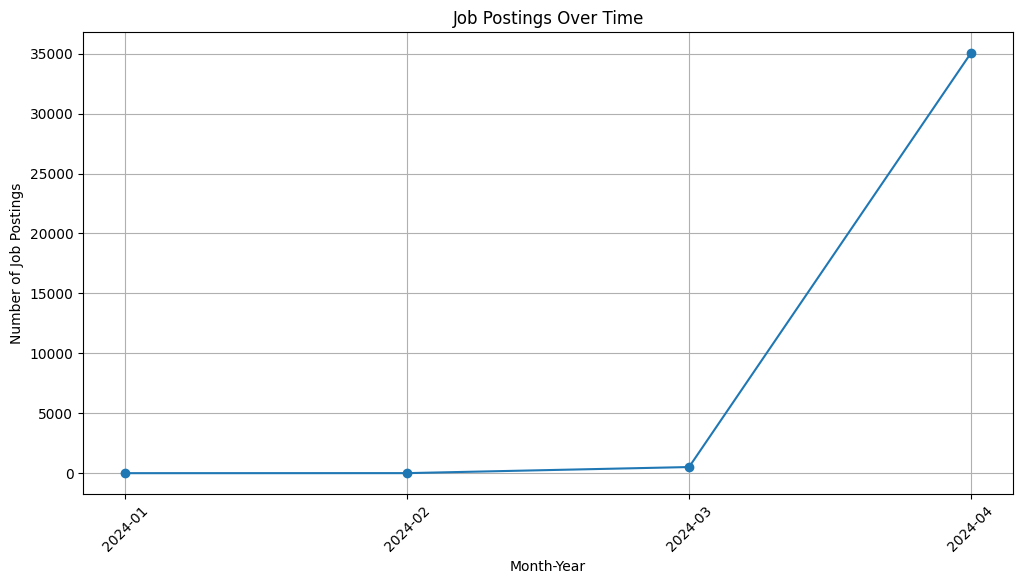

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_postings['month_year'].astype(str), monthly_postings['job_posting_count'], marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Company Growth Analysis
#### **Aggregate Job Postings by Company:** Identify companies with the most job postings.


The **postings** DataFrame is grouped by **company_id** and **company_name** to count the number of job postings for each company, resulting in the **company_postings** DataFrame. This data is then sorted in descending order based on **job_posting_count**, and the top 50 companies with the most job postings are selected and stored in **top_companies**.


In [11]:
company_postings = postings.groupby(['company_id', 'company_name']).size().reset_index(name='job_posting_count')
top_companies = company_postings.sort_values(by='job_posting_count', ascending=False).head(50)

In [10]:
top_companies

,company_id,company_name,job_posting_count
3041,167757,The Job Network,350
886,11056,Insight Global,342
7771,18860134,Jobot,202
89,1681,Robert Half,171
3189,248184,Creative Financial Staffing (CFS),152
901,11229,Vaco,134
73,1586,Amazon,124
429,4787,Apex Systems,117
480,5235,LHH,117
5227,2396310,Randstad USA,106


In [12]:
employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


### Merging Employee Counts with Top Companies

The **top_companies** DataFrame is merged with the **employee_counts** DataFrame using a left join on the **company_id** column. 


In [16]:
top_companies = top_companies.merge(employee_counts[['company_id', 'employee_count']], on='company_id', how='left')

In [27]:
top_companies

,company_id,company_name,job_posting_count,employee_count_x,employee_count_y
0,167757,The Job Network,350,73,73
1,11056,Insight Global,342,14122,14122
2,11056,Insight Global,342,14122,14127
3,11056,Insight Global,342,14122,14144
4,11056,Insight Global,342,14122,14152
...,...,...,...,...,...
2177,61677,eTeam,62,3296,3295
2178,61677,eTeam,62,3296,3309
2179,61677,eTeam,62,3296,3304
2180,61677,eTeam,62,3296,3302


In [23]:
top_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company_id         2182 non-null   int32 
 1   company_name       2182 non-null   string
 2   job_posting_count  2182 non-null   int64 
 3   employee_count_x   2182 non-null   int64 
 4   employee_count_y   2182 non-null   int64 
dtypes: int32(1), int64(3), string(1)
memory usage: 76.8 KB


### Cleaning the Top Companies DataFrame

The **employee_count_y** column is dropped from the **top_companies** DataFrame to eliminate redundancy. Then, duplicate entries are removed based on the combination of **company_id**, **company_name**, and **job_posting_count**. The cleaned DataFrame is stored in **top_companies_cleaned**, ensuring unique records for further analysis.


In [36]:

df = top_companies.drop(columns=['employee_count_y'])
top_companies_cleaned = df.drop_duplicates(subset=['company_id', 'company_name', 'job_posting_count'], keep='first')
top_companies_cleaned

,company_id,company_name,job_posting_count,employee_count_x
0,167757,The Job Network,350,73
1,11056,Insight Global,342,14122
122,18860134,Jobot,202,3643
186,1681,Robert Half,171,29268
330,248184,Creative Financial Staffing (CFS),152,795
334,11229,Vaco,134,4883
434,1586,Amazon,124,743191
534,4787,Apex Systems,117,13125
583,5235,LHH,117,13428
752,2396310,Randstad USA,106,8971


<span style="color: red;"> DO NOT RUN THE BELOW CODE </span>

In [32]:
# Take the first occurrence of employee_count for each company
top_companies_cleaned = df.drop_duplicates(subset=['company_id', 'company_name'], keep='first')

# Or for the last occurrence, you can use:
# top_companies_cleaned = top_companies.drop_duplicates(subset=['company_id', 'company_name'], keep='last')

print(top_companies_cleaned)


      company_id                             company_name  job_posting_count  \
0         167757                          The Job Network                350   
1          11056                           Insight Global                342   
122     18860134                                    Jobot                202   
186         1681                              Robert Half                171   
330       248184        Creative Financial Staffing (CFS)                152   
334        11229                                     Vaco                134   
434         1586                                   Amazon                124   
534         4787                             Apex Systems                117   
583         5235                                      LHH                117   
752      2396310                             Randstad USA                106   
816      1506196  Health Carousel Nursing & Allied Health                104   
825      2204084                        

### Visualizing Job Posting Count vs. Employee Count

**Seaborn** and **matplotlib** are imported for data visualization, and the plot style is set to "whitegrid." A scatter plot is created to show the relationship between **employee_count** and **job_posting_count** from the **top_companies_cleaned** DataFrame. The plot is customized with a title and labeled axes for clarity. Finally, the plot is displayed to visualize the data.


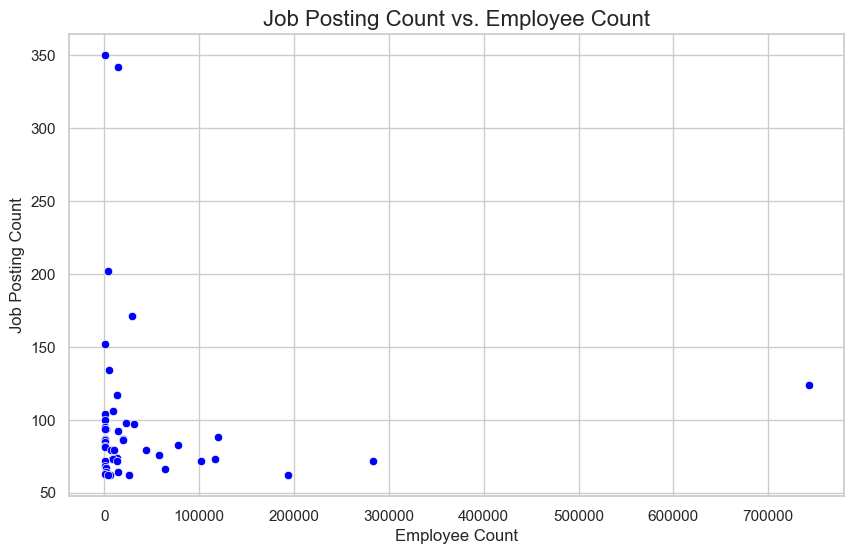

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x='employee_count_x', y='job_posting_count', data=top_companies_cleaned, color='blue')

# Adding labels and title
plt.title('Job Posting Count vs. Employee Count', fontsize=16)
plt.xlabel('Employee Count', fontsize=12)
plt.ylabel('Job Posting Count', fontsize=12)

# Show the plot
plt.show()


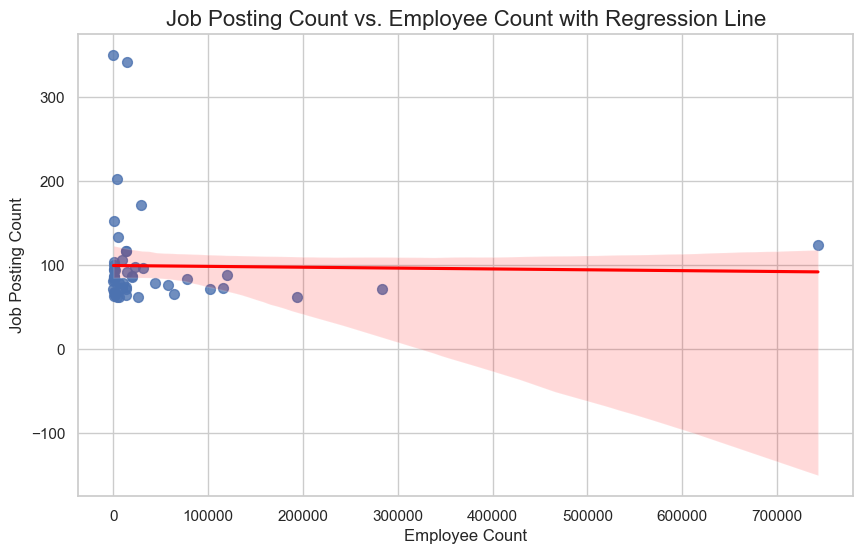

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='employee_count_x', y='job_posting_count', data=top_companies_cleaned, scatter_kws={'s':50}, line_kws={'color':'red'})

# Adding labels and title
plt.title('Job Posting Count vs. Employee Count with Regression Line', fontsize=16)
plt.xlabel('Employee Count', fontsize=12)
plt.ylabel('Job Posting Count', fontsize=12)

plt.show()

### Analyzing Average Job Postings by Employee Size Category

Employee size bins are created using **pd.cut()**, categorizing companies based on the **employee_count_x** column into six groups: **Very Small**, **Small**, **Medium**, **Large**, **Very Large**, and **Extra Large**. 

The **top_companies_cleaned** DataFrame is then grouped by these bins to calculate the mean **job_posting_count** for each category, resulting in the **line_data** DataFrame.

A line plot is created to visualize the average job postings for each employee size category. The plot includes markers for clarity, along with labeled axes and a title for better understanding of the relationship between employee size and job postings.


C:\Users\My Account\AppData\Local\Temp\ipykernel_13808\1382270459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_companies_cleaned['employee_size_bin'] = pd.cut(top_companies_cleaned['employee_count_x'],
C:\Users\My Account\AppData\Local\Temp\ipykernel_13808\1382270459.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_data = top_companies_cleaned.groupby('employee_size_bin').agg({'job_posting_count': 'mean'}).reset_index()


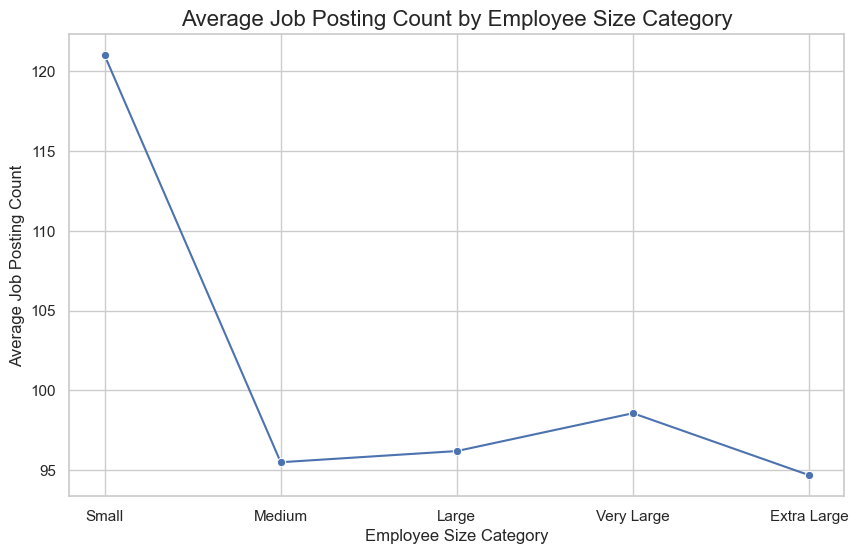

In [40]:
import pandas as pd

# Create employee size bins
top_companies_cleaned['employee_size_bin'] = pd.cut(top_companies_cleaned['employee_count_x'], 
                                                     bins=[0, 50, 200, 500, 1000, 5000, float('inf')],
                                                     labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Extra Large'])

# Group by the new bins and calculate the mean job postings
line_data = top_companies_cleaned.groupby('employee_size_bin').agg({'job_posting_count': 'mean'}).reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='employee_size_bin', y='job_posting_count', data=line_data, marker='o')

# Adding labels and title
plt.title('Average Job Posting Count by Employee Size Category', fontsize=16)
plt.xlabel('Employee Size Category', fontsize=12)
plt.ylabel('Average Job Posting Count', fontsize=12)

plt.show()


In [43]:
import plotly.express as px

# Create the line graph with Plotly
fig = px.line(line_data, x='employee_size_bin', y='job_posting_count', 
              title='Average Job Posting Count by Employee Size Category',
              markers=True)

# Show the plot
fig.update_layout(xaxis_title='Employee Size Category', yaxis_title='Average Job Posting Count')
fig.show()


In [42]:
import nbformat
print(nbformat.__version__)

5.10.4


### Creating an Interactive Line Graph with Plotly

A line graph is created to visualize the number of job postings for the top 50 companies using Plotly Express.

1. **Figure Creation**:
   - The `px.line()` function is used to generate the line graph, with the following parameters:
     - **Data Source**: The **top_companies_cleaned** DataFrame serves as the data source, containing the company names and their corresponding job posting counts.
     - **X-Axis**: Set to **company_name**, which represents the names of the companies.
     - **Y-Axis**: Set to **job_posting_count**, showing the number of job postings for each company.
     - **Title**: The graph is titled **"Top 50 Companies with Highest Job Openings"**, providing context for the viewer.
     - **Markers**: Enabled with **markers=True**, allowing for easy identification of individual data points.
     - **Hover Data**: Additional information is included with **hover_data={'employee_count': True, 'job_posting_count': True}**, displaying the employee count and job posting count when hovering over data points.

2. **Updating Layout**:
   - The layout of the plot is customized using `fig.update_layout()`:
     - **X-Axis Title**: Set to **"Company Name"**, clarifying what is represented on the x-axis.
     - **Y-Axis Title**: Set to **"Job Posting Count"**, indicating the values represented on the y-axis.

3. **Displaying the Plot**:
   - Finally, the plot is rendered using `fig.show()`, allowing for interaction and exploration of the visualized data.

This interactive line graph provides a clear comparison of job posting activity across the top 50 companies, making it a valuable tool for analyzing hiring trends in the job market.


In [44]:

# Create the line graph with Plotly
fig = px.line(top_companies_cleaned, 
              x='company_name', 
              y='job_posting_count', 
              title='Top 50 Companies with Highest Job Openings',
              markers=True, 
              hover_data={'employee_count_x': True, 'job_posting_count': True})

# Show the plot
fig.update_layout(xaxis_title='Company Name', 
                  yaxis_title='Job Posting Count')

# Show the plot
fig.show()


In [45]:
import ipywidgets as widgets
from IPython.display import display

### Function to Create and Display the Top Companies Plot

A function is defined to generate an interactive line graph displaying the top companies with the highest job openings, based on user-selected criteria.

1. **Function Definition**:
   - The function `plot_top_companies(num_companies)` takes one parameter, **num_companies**, which specifies the number of top companies to display.

2. **Sorting Companies**:
   - Inside the function, the **top_companies_cleaned** DataFrame is sorted by **job_posting_count** in descending order to identify the top N companies. The `head(num_companies)` method selects the specified number of companies.

3. **Creating the Line Graph**:
   - A line graph is generated using `px.line()` with the following parameters:
     - **Data Source**: The sorted **top_n_companies** DataFrame.
     - **X-Axis**: Set to **company_name**, representing the companies.
     - **Y-Axis**: Set to **job_posting_count**, showing the number of job postings.
     - **Title**: Dynamically created using an f-string to display the number of companies, e.g., **"Top N Companies with Highest Job Openings"**.
     - **Markers**: Enabled to highlight individual data points.
     - **Hover Data**: Additional information for **employee_count** and **job_posting_count** is included for user interaction.

4. **Updating Layout**:
   - The layout of the figure is customized using `fig.update_layout()`:
     - **X-Axis Title**: Set to **"Company Name"**.
     - **Y-Axis Title**: Set to **"Job Posting Count"**.
     - **X-Axis Tick Angle**: Set to -45 degrees to improve readability of the company names.

5. **Displaying the Plot**:
   - The plot is displayed with `fig.show()`.

### Interactive Slider for User Input

1. **Slider Creation**:
   - An interactive slider is created using `widgets.IntSlider` to allow users to select the number of companies to display:
     - **Initial Value**: Set to 100.
     - **Minimum and Maximum Values**: Range from 10 to 100.
     - **Step Size**: Increment by 10.

2. **Output Area**:
   - An output widget is created to display the plot.

3. **Displaying the Slider and Plot**:
   - The slider and output area are displayed using the `display()` function.

4. **Updating the Plot**:
   - The `update_plot(change)` function is defined to update the graph when the slider value changes:
     - It clears the previous output and calls the `plot_top_companies()` function with the new slider value.

5. **Observing Slider Changes**:
   - The slider is linked to the `update_plot()` function using the `observe()` method, which listens for changes to the slider's value.

6. **Initial Plot Display**:
   - The initial plot is generated by calling `plot_top_companies(num_companies_slider.value)`, using the slider's starting value.

This code snippet provides a dynamic and interactive way to visualize the top companies with the highest job openings, allowing users to adjust the number of companies displayed in the plot easily.


In [1]:

# Function to create and display the plot
def plot_top_companies(num_companies):
    # Sort to get the top N companies by job posting count
    top_n_companies = top_companies_cleaned.sort_values(by='job_posting_count', ascending=False).head(num_companies)

    # Create the line graph with Plotly
    fig = px.line(top_n_companies, 
                  x='company_name', 
                  y='job_posting_count', 
                  title=f'Top {num_companies} Companies with Highest Job Openings',
                  markers=True, 
                  hover_data={'employee_count_x': True, 'job_posting_count': True})

    # Update layout for better display
    fig.update_layout(xaxis_title='Company Name', 
                      yaxis_title='Job Posting Count',
                      xaxis_tickangle=-45)

    # Show the plot
    fig.show()

# Create a slider for selecting the number of companies to display
num_companies_slider = widgets.IntSlider(value=100, min=10, max=100, step=10, description='Number of Companies:')
output = widgets.Output()

# Display the slider and plot
display(num_companies_slider, output)

# Update the plot when the slider value changes
def update_plot(change):
    with output:
        output.clear_output()  # Clear previous output
        plot_top_companies(change['new'])

# Attach the update function to the slider
num_companies_slider.observe(update_plot, names='value')

# Initial plot
plot_top_companies(num_companies_slider.value)


NameError: name 'widgets' is not defined